

```

```

итоговый результат по месяцам:
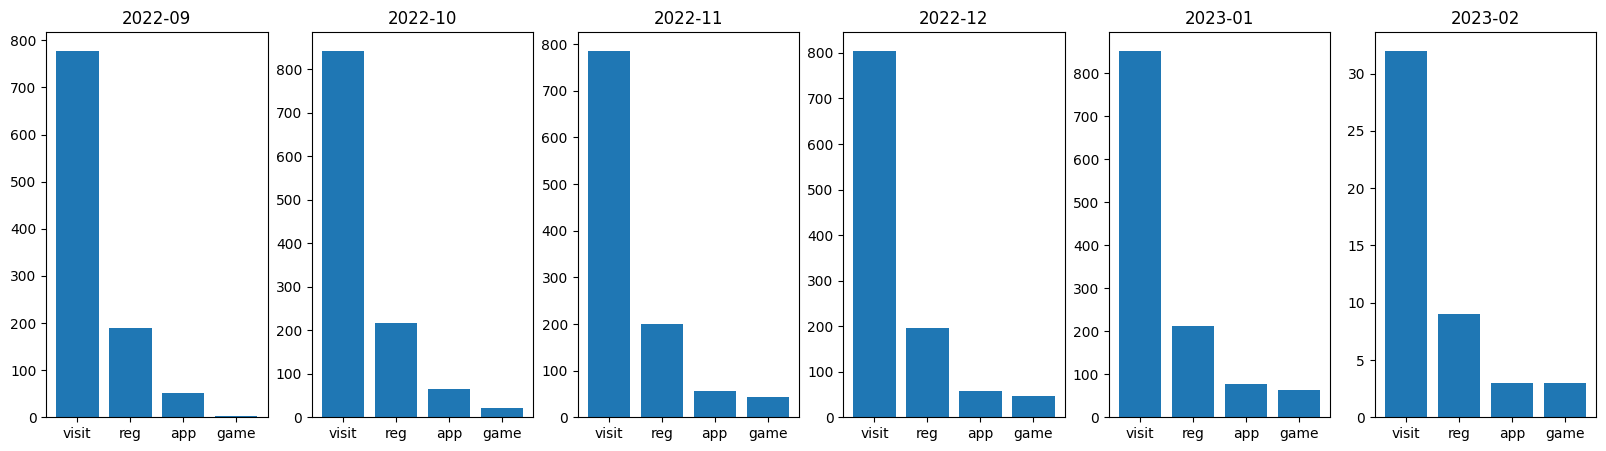



---



график по всему времени:


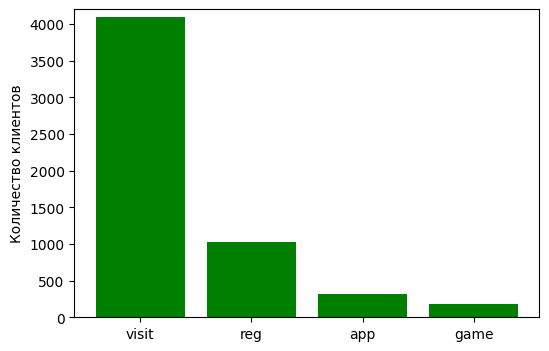

Вывод: все же очень маленький процент из тех, кто посетил сайт, по итогу завершает игру, значит, на сайте надо получше привлекать к регистрации. Изначально, я думаю, стоит ввести какой-то бонус при регистрации (уж очень бросается в глаза соотношение посещений и регистраций), скидку на первую игру (может даже, скидку на первую игру в течении месяца или с момента регистрации). Может, стоит поработать над сайтом, вынести кнопку "зарегистрироваться" куда-нибудь поудобней, сделать ее поярче. Количество игр клиентов по месяцам, конечно, растет, что не может не радовать.

дальше - то, как это было получено :)


Пишем запросы и смотрим на табличку, начиная с момента подачи заявки на игру добавляем distinct в запрос, чтобы учесть именно уникальных клиентов (нас же интересует соотношение количества именно клиентов, а не игр)

импортируем все, что нужно

In [ ]:
import psycopg2
import numpy as np
import pandas as pd

In [ ]:
conn = psycopg2.connect(
    host="158.160.52.106",
    port=5432,
    database="postgres",
    user="student",
    password="JvLda93aA",
)
cur = conn.cursor()

cur.execute("SELECT * FROM msu_analytics.game")


data = cur.fetchall()

OperationalError: ignored

просто смотрим на таблички

In [ ]:
pd.read_sql("SELECT * FROM msu_analytics.client", conn).head()

/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,client_rk,first_name,last_name,phone_num,visit_dttm
0,28,Родион,Ильин,+79685707345,2022-11-28 07:57:58.338674
1,108,Раиса,Никифорова,+79664187124,2023-01-04 05:31:33.158886
2,124,Август,Беспалов,+79683901802,2022-11-03 23:51:40.644591
3,204,Клим,Лыткин,+79633966259,2023-01-06 06:10:40.488902
4,220,Валентина,Дементьева,+79537555870,2022-09-09 21:54:34.067697


In [ ]:
df_client = pd.read_sql("SELECT * FROM msu_analytics.client", conn)

/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


запрос для количества посещений сайта

In [ ]:
request_1 = "select count(*) as cnt, (to_char(visit_dttm, 'YYYY') || '-' || extract(week from visit_dttm)) as week, extract(month from visit_dttm) as month, extract(year from visit_dttm) as year from msu_analytics.client group by year, month, week order by year, month, week"

In [ ]:
conn = psycopg2.connect(
    host="158.160.52.106",
    port=5432,
    database="postgres",
    user="student",
    password="JvLda93aA",
)
cur = conn.cursor()

cur.execute(request_1)


data = cur.fetchall()
df1 = pd.read_sql(request_1, conn)

/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


количество посещений сайта:

In [ ]:
df1

,cnt,week,month,year
0,111,2022-35,9.0,2022.0
1,184,2022-36,9.0,2022.0
2,167,2022-37,9.0,2022.0
3,181,2022-38,9.0,2022.0
4,135,2022-39,9.0,2022.0
5,60,2022-39,10.0,2022.0
6,204,2022-40,10.0,2022.0
7,190,2022-41,10.0,2022.0
8,171,2022-42,10.0,2022.0
9,189,2022-43,10.0,2022.0


запрос для количества регистраций на сайте по месяцам и неделям:

In [ ]:
request_2 = """select count(*) as cnt, (to_char(registration_dttm, 'YYYY') || '-' || extract(week from registration_dttm)) as week, extract(month from registration_dttm) as month, extract(year from registration_dttm) as year from msu_analytics.account group by year, month, week order by year, month, week"""

In [ ]:
conn = psycopg2.connect(
    host="158.160.52.106",
    port=5432,
    database="postgres",
    user="student",
    password="JvLda93aA",
)
cur = conn.cursor()

cur.execute(request_2)


data = cur.fetchall()
df2 = pd.read_sql(request_2, conn)

/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


зарегистрировались:

In [ ]:
df2

,cnt,week,month,year
0,22,2022-35,9.0,2022.0
1,38,2022-36,9.0,2022.0
2,42,2022-37,9.0,2022.0
3,46,2022-38,9.0,2022.0
4,38,2022-39,9.0,2022.0
5,18,2022-39,10.0,2022.0
6,59,2022-40,10.0,2022.0
7,46,2022-41,10.0,2022.0
8,42,2022-42,10.0,2022.0
9,48,2022-43,10.0,2022.0


запрос для количества заявок по месяцам:


In [ ]:
request_3 = "select count(distinct account_rk) as cnt, (to_char(application_dttm, 'YYYY') || '-' || extract(week from application_dttm)) as week, extract(month from application_dttm) as month, extract(year from application_dttm) as year from msu_analytics.application group by year, month, week order by year, month, week"

In [ ]:
conn = psycopg2.connect(
    host="158.160.52.106",
    port=5432,
    database="postgres",
    user="student",
    password="JvLda93aA",
)
cur = conn.cursor()

cur.execute(request_3)


data = cur.fetchall()
df3 = pd.read_sql(request_3, conn)

/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


заявки

In [ ]:
df3

,cnt,week,month,year
0,7,2022-36,9.0,2022.0
1,12,2022-37,9.0,2022.0
2,21,2022-38,9.0,2022.0
3,14,2022-39,9.0,2022.0
4,3,2022-39,10.0,2022.0
5,23,2022-40,10.0,2022.0
6,24,2022-41,10.0,2022.0
7,24,2022-42,10.0,2022.0
8,13,2022-43,10.0,2022.0
9,3,2022-44,10.0,2022.0


запрос для количества проведенных игр:

In [ ]:
request_4 = "select count(distinct game_rk) as cnt, (to_char(game_dttm, 'YYYY') || '-' || extract(week from game_dttm)) as week, extract(month from game_dttm) as month, extract(year from game_dttm) as year from msu_analytics.game where game_flg = 1 group by year, month, week order by year, month, week"

In [ ]:
conn = psycopg2.connect(
    host="158.160.52.106",
    port=5432,
    database="postgres",
    user="student",
    password="JvLda93aA",
)
cur = conn.cursor()

cur.execute(request_4)


data = cur.fetchall()
df4 = pd.read_sql(request_4, conn)

/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


количество проведенных игр по месяцам и неделям:

In [ ]:
df4

,cnt,week,month,year
0,1,2022-37,9.0,2022.0
1,1,2022-38,9.0,2022.0
2,1,2022-39,10.0,2022.0
3,5,2022-40,10.0,2022.0
4,3,2022-41,10.0,2022.0
5,5,2022-42,10.0,2022.0
6,7,2022-43,10.0,2022.0
7,8,2022-44,11.0,2022.0
8,10,2022-45,11.0,2022.0
9,7,2022-46,11.0,2022.0


итоговые воронки по месяцам:


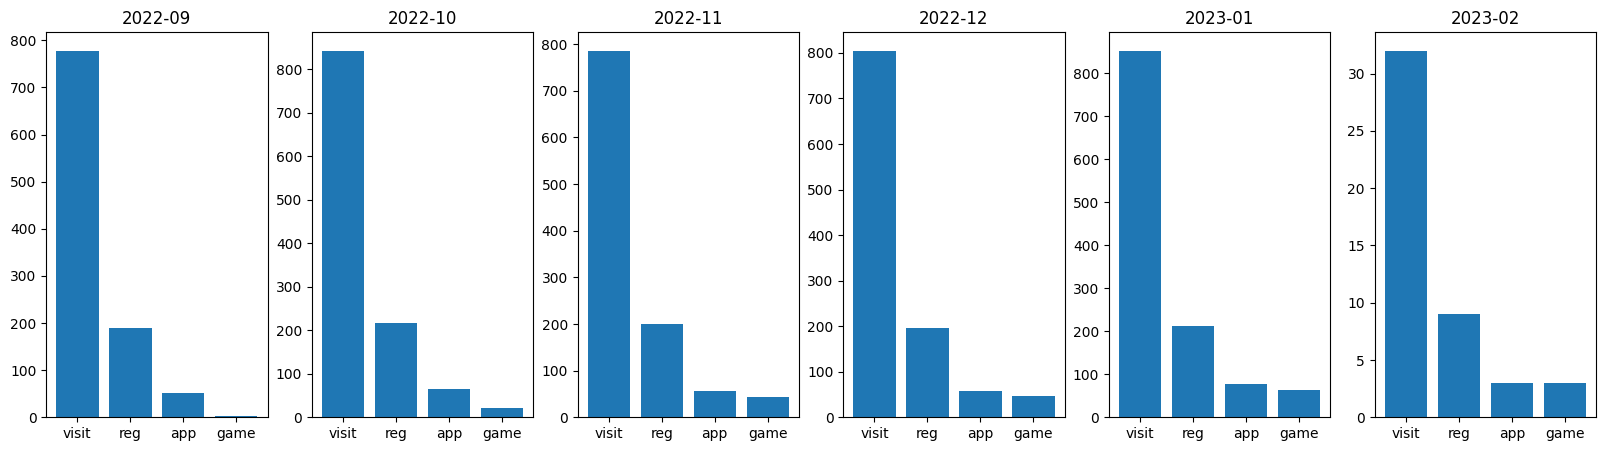

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(20, 5))


data1 = [778, 190, 51, 2]
data2 = [843, 217, 65, 21]
data3 = [786, 200, 56, 43]
data4 = [805, 196, 57, 47]
data5 = [852, 213, 77, 63]
data6 = [32, 9, 3, 3]

steps = ['visit', 'reg', 'app', 'game']

ax.bar(steps, data)

axs[0].bar(steps, data1)
axs[0].set_title('2022-09')

axs[1].bar(steps, data2)
axs[1].set_title('2022-10')

axs[2].bar(steps, data3)
axs[2].set_title('2022-11')

axs[3].bar(steps, data4)
axs[3].set_title('2022-12')

axs[4].bar(steps, data5)
axs[4].set_title('2023-01')

axs[5].bar(steps, data6)
axs[5].set_title('2023-02')

plt.subplots_adjust(wspace=0.2)
plt.show()

суммарный график:

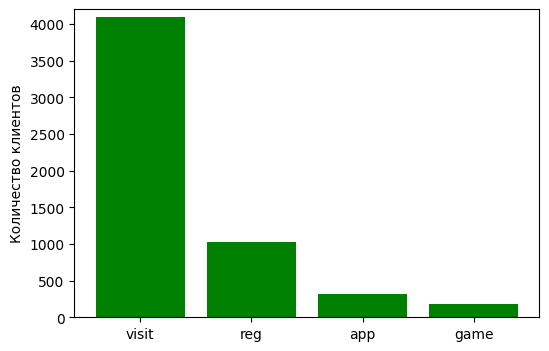

In [ ]:
import matplotlib.pyplot as plt

# Данные для воронки
data = [sum(df1['cnt']), sum(df2['cnt']), sum(df3['cnt']), sum(df4['cnt'])]

# Названия шагов воронки
steps = ['visit', 'reg', 'app', 'game']

# Создаем объект воронки
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Строим воронку
ax.bar(steps, data, color = "green")

# Настраиваем оси и заголовок графика
ax.set_ylim(0, 4200)
ax.set_ylabel('Количество клиентов')

# Отображаем график
plt.show()